<a href="https://colab.research.google.com/github/PMartey/DataJourney/blob/main/Using_a_pre_trained_object_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Using a Pre-trained Object Recognition Model (vgg16)
### Pamela Martey

What is the VGG16:  
The VGG-16 model is a convolutional neural network (CNN) architecture that was proposed by the Visual Geometry Group (VGG) at the University of Oxford. It is characterized by its depth, consisting of 16 layers, including 13 convolutional layers and 3 fully connected layers.  
link to source: (https://www.geeksforgeeks.org/vgg-16-cnn-model/)

In [ ]:
#Loading the weights for the vgg16 model, from the keras library
import keras
from keras.applications.vgg16 import VGG16

### Define the keras model

In [ ]:
#define the keras model
model = VGG16()
#the VGG16 model summary
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

 So the model expects input images with the size 224 x 224 pixels with 3 channels (e.g. color)

#### Plot of layers in the VGG16 model

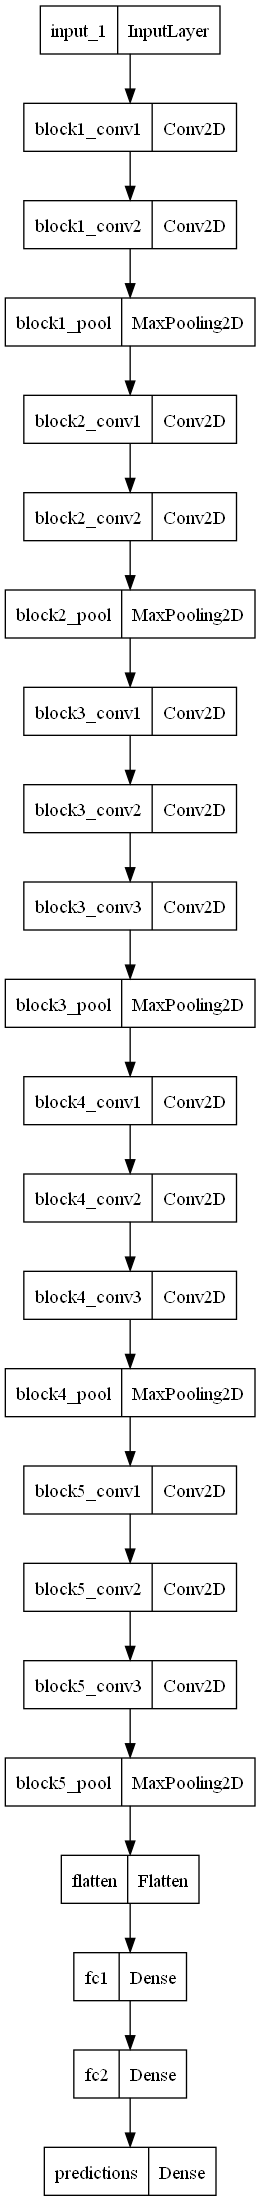

In [ ]:
#plot of layers in the VGG16 model
import pydot
#import graphviz # Import graphviz here after installing it
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='vgg.png')

####  Load and prepare or resize mug image

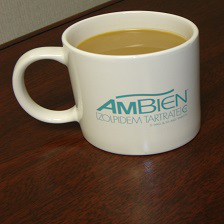

In [ ]:
#load and prepare or resize mug image
# this code didnt work because of my version from keras.preprocessing.image import load_img #load an image from file
from tensorflow.keras.preprocessing.image import load_img

image = load_img(r'C:\Users\pmlma\Downloads\mug.jpg', target_size=(224,224))
image

Testing if my VGG16 model can Identify the coffee mug

In [ ]:
import tensorflow as tf
print(tf.__version__)
# checking my version of tensorflow

2.12.0


In [ ]:
#convert pixels to numpy array so that we can work with it in keras
from tensorflow.keras.preprocessing.image import  img_to_array
#convert the image pixels to a NumPy array
image = img_to_array(image)

In [ ]:
#reshape the NumPy array of pixels
image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))


In [ ]:
from keras.applications.vgg16 import preprocess_input
#prepare the image for the VGG model
image = preprocess_input(image)

In [ ]:
#predict the probability across all output classes
# i.e. call the predict() func on the model in order to get a prediction of the probability of the image
#belonging to each of the 1,000 unknown object types
yhat= model.predict(image)

1/1 [==============================] - 0s 432ms/step


In [ ]:
# interpret prediction
from keras.applications.vgg16 import decode_predictions
#convert the probabilities to class labels
label = decode_predictions(yhat, top = 5)
#retrieve the most likely result, e.g. highest probability
label = label[0][0]
#print the classification
print('%s(%.2f%%)'%(label[1],label[2]*100))


coffee_mug(91.65%)


So the VGG16 model was able to predict that my image is a coffee mug with a 91.65% accuracy.  
VGG16 proved to be a significant milestone in the quest of mankind to make computers “see” the world. A lot of effort has been put into improving this ability under the discipline of Computer Vision (CV) for a number of decades. VGG16 is one of the significant innovations that paved the way for several innovations that followed in this field.  

**VGG 16 Use Cases**  
VGG16 keeps the data scientists and researchers worldwide interested despite the advent of many new and better scoring models since the time VGG was originally proposed. Here are a few use cases where you may find VGG16 practically in use.

**Image Recognition or Classification** – VGG16 can be used for disease diagnosis using medical imaging like x-ray or MRI. It can also be used in recognizing street signs from a moving vehicle.  
**Image Detection and Localization** – We didn’t discuss the detection abilities of VGG16 earlier, but it can perform really well in image detection use cases. In fact, it was the winner of ImageNet detection challenge in 2014 (where it ended up as first runner up for classification challenge)  
**Image Embedding Vectors** – After popping out the top output layer, the model can be used to train to create image embedding vectors which can be used for a problem like face verification using VGG16 inside a Siamese network.   
source(https://www.mygreatlearning.com/blog/introduction-to-vgg16/#:~:text=VGG16%20proved%20to%20be%20a%20significant%20milestone%20in,for%20several%20innovations%20that%20followed%20in%20this%20field)